In [1]:
# 测试时间
# 开始6:55
# 结束7:05
from utils.time_series_ONMF_COVID19 import ONMF_timeseries_reconstructor
import numpy as np

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [3]:
print('pre-training temporal dictionary started...')

path_confirmed = "Data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
path_deaths = "Data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
path_recovered = "Data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

path_COVIDactnow = "Data/states.NO_INTERVENTION.timeseries.csv"
path_COVID_tracking_proj = "Data/us_states_COVID_tracking_project.csv"
# path_NYT_data  = "Data/NYT_us-states.csv"

foldername = 'test3'  ## for saving files
# source = [path_confirmed, path_deaths, path_recovered]
# source = [path_confirmed, path_deaths, path_recovered]
source = [path_COVIDactnow]

n_components = 16

# country_list = ['Korea, South', 'China', 'US', 'Italy', 'Germany', 'Spain']
# state_list = ['California']
state_list = ['California', 'Florida', 'Texas', 'New York']
# state_list = ['CA', 'FL', 'TX', 'NY']
# country_list = ['Russia', 'Brazil']

# input_variable_list = ['input_hospitalized_Currently']

data_source_list = ['COVID_ACT_NOW', 'COVID_TRACKING_PROJECT', 'JHU']
data_source = data_source_list[1]
if_train_fresh = True
# if_display_dict = False
if_display_dict = True
if_recons = False
if_ONMF_timeseris_predictor_historic = True
L = 60  ## prediction length
num_trials = 3

pre-training temporal dictionary started...


In [4]:
reconstructor = ONMF_timeseries_reconstructor(path=path_COVID_tracking_proj,
                                          source=source,
                                          data_source=data_source,
                                          country_list=None,
                                          # state_list=state_list,
                                          state_list_test=state_list,
                                          state_list_train=state_list,
                                          alpha=3,  # L1 sparsity regularizer for minibatch and online learning
                                          beta=1,  # default learning exponent -- customized in both trianing
                                          # and online prediction functions learning rate exponent in online
                                          # learning -- smaller weighs new data more
                                          n_components=n_components,  # number of dictionary elements -- rank
                                          ONMF_iterations=50,  # number of iterations for the ONTF algorithm
                                          ONMF_sub_iterations=2,
                                          # number of i.i.d. subsampling for each iteration of ONTF
                                          ONMF_batch_size=50,  # number of patches used in i.i.d. subsampling
                                          num_patches_perbatch=100,
                                          # number of patches per ONMF iteration (size of mini batch)
                                          # number of patches that ONTF algorithm learns from at each iteration
                                          patch_size=10,
                                          prediction_length=1,
                                          learnevery=1,
                                          subsample=False,
                                          if_onlynewcases=True,
                                          # take the derivate of the time-series of total to get new cases
                                          if_moving_avg_data=False,
                                          if_log_scale=True)

LOADING.. COVID_TRACKING_PROJECT
State AK, start_date 2020-03-06, end_date 2020-08-13
State AL, start_date 2020-03-07, end_date 2020-08-13
State AR, start_date 2020-03-06, end_date 2020-08-13
State AS, start_date 2020-03-16, end_date 2020-08-13
State AZ, start_date 2020-03-04, end_date 2020-08-13
State CA, start_date 2020-03-04, end_date 2020-08-13
State CO, start_date 2020-03-05, end_date 2020-08-13
State CT, start_date 2020-03-07, end_date 2020-08-13
State DC, start_date 2020-03-05, end_date 2020-08-13
State DE, start_date 2020-03-06, end_date 2020-08-13
State FL, start_date 2020-03-04, end_date 2020-08-13
State GA, start_date 2020-03-04, end_date 2020-08-13
State GU, start_date 2020-03-16, end_date 2020-08-13
State HI, start_date 2020-03-07, end_date 2020-08-13
State IA, start_date 2020-03-06, end_date 2020-08-13
State ID, start_date 2020-03-07, end_date 2020-08-13
State IL, start_date 2020-03-04, end_date 2020-08-13
State IN, start_date 2020-03-06, end_date 2020-08-13
State KS, sta

In [5]:
# 临时增加，容易挂掉内核
# if_recons = True 

In [6]:
### Minibatch + Online dictionary learning
if if_recons:
    ### Online dictionary learning and prediction
    A_recons, W1, At1, Bt1, H = reconstructor.ONMF_predictor(mode=3,
                                                         learn_from_future2past=True,
                                                         ini_dict=None,
                                                         foldername=foldername,
                                                         beta=4,
                                                         # no effect if "if_learn_online" is false
                                                         ini_A=None,
                                                         ini_B=None,
                                                         a1=0,
                                                         # regularizer for training
                                                         a2=0,
                                                         # regularizer for prediction
                                                         future_extrapolation_length=L,
                                                         if_learn_online=True,
                                                         if_save=True,
                                                         minibatch_training_initialization=True,
                                                         minibatch_alpha=3,
                                                         minibatch_beta=1,
                                                         print_iter=True,
                                                         num_trials=num_trials)

    print('A_recons.shape', A_recons.shape)
    print('A_recons', A_recons)

reconstructor.ONMF_predictor_historic此处耗时最多，大致为几分钟

Running ONMF_timeseries_predictor_historic along mode 3...
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
new cases predicted final 0.032347214638410365
!!!!! A_recons.shape (4, 18, 4)
Current (trial, day) for ONMF_predictor_historic (1, 1) out of (3, 24)
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_

dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
new cases predicted final 0.033618269245551974
!!!!! A_recons.shape (4, 29, 4)
Current (trial, day) for ONMF_predictor_historic (1, 12) out of (3, 24)
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4

dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
new cases predicted final 0.009760292166975609
!!!!! A_recons.shape (4, 40, 4)
Current (trial, day) for ONMF_predictor_historic (1, 23) out of (3, 24)
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4

C:\ProgramData\Anaconda3\envs\ONMF-COVID19\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
new cases predicted final 0.02758935916709916
!!!!! A_recons.shape (4, 18, 4)
Current (trial, day) for ONMF_predictor_historic (2, 1) out of (3, 24)
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 

dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
new cases predicted final 0.02951188427420099
!!!!! A_recons.shape (4, 29, 4)
Current (trial, day) for ONMF_predictor_historic (2, 12) out of (3, 24)
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4,

dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
new cases predicted final 0.03037365849523732
!!!!! A_recons.shape (4, 40, 4)
Current (trial, day) for ONMF_predictor_historic (2, 23) out of (3, 24)
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4,

dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
new cases predicted final 0.036646057575125776
!!!!! A_recons.shape (4, 27, 4)
Current (trial, day) for ONMF_predictor_historic (3, 10) out of (3, 24)
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4

dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
new cases predicted final 0.03168259544071785
!!!!! A_recons.shape (4, 38, 4)
Current (trial, day) for ONMF_predictor_historic (3, 21) out of (3, 24)
online learning and predicting from patches along mode 3...
training dictionaries from patches along mode 3...
dict_shape: (160, 16)
code_shape: (16, 100)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4, 9, 4)
!!!!! patch_recons.shape (4, 1, 4)
!!!!! patch.shape (4,

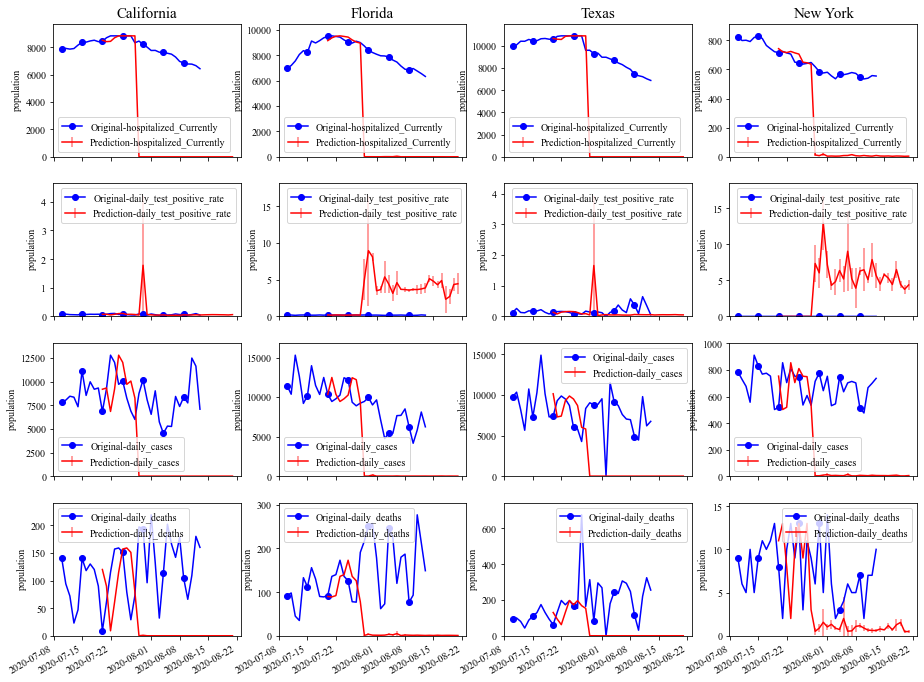

In [7]:
### Run ONMF_prediction on the entire dataset for validation
if if_ONMF_timeseris_predictor_historic:
    A_full_predictions_trials, W_total_seq, code = reconstructor.ONMF_predictor_historic(mode=3,
                                                                                     foldername=foldername,
                                                                                     learn_from_future2past=True,
                                                                                     ini_dict=None,
                                                                                     ini_A=None,
                                                                                     ini_B=None,
                                                                                     beta=1,
                                                                                     a1=0,
                                                                                     # regularizer for the
                                                                                     # code in partial fitting
                                                                                     a2=0,
                                                                                     # regularizer for the
                                                                                     # code in recursive
                                                                                     # prediction
                                                                                     future_extrapolation_length=7,
                                                                                     if_save=True,
                                                                                     minibatch_training_initialization=True,
                                                                                     minibatch_alpha=1,
                                                                                     minibatch_beta=1,
                                                                                     num_trials=num_trials)  # take a number of trials to generate empirical confidence interval

    print('A_full_predictions_trials.shape', A_full_predictions_trials.shape)
    print('A_full_predictions_trials', A_full_predictions_trials)

    list_states_abb = [us_state_abbrev[state] for state in state_list]
    list_states_abb = '-'.join(list_states_abb)

    ### plot online-trained dictionary (from last iteration)
    filename = "full_prediction_trials_" + str(num_trials) + "_" + list_states_abb

    # for state in state_list:
    #    reconstructor.display_dictionary_Hospital(W_total_seq[-1,:,:], state_name=state, if_show=True, if_save=True,
    #                                              foldername=foldername,
    #                                              filename='online_' + filename)

    ### plot original and prediction curves

    reconstructor.display_prediction_evaluation(A_full_predictions_trials[:, ], if_show=True, if_save=True,
                                                foldername=foldername,
                                                filename=filename, if_errorbar=True, if_evaluation=True, title=None)

In [8]:
np.save("Time_series_dictionary/full_result_" + str(data_source), reconstructor.result_dict)

In [9]:
# np.save('Time_series_dictionary/' + str(foldername) + '/recons_nononline', A_recons)

# print('change in dictionary after online learning', np.linalg.norm(W_old - W1))

In [10]:
'''
### For loading saved checkpoints just for plotting
W1 = np.load('Time_series_dictionary/' + str(foldername) + '/dict_learned_3_pretraining_Korea, South.npy')
code = np.load('Time_series_dictionary/' + str(foldername) + '/code_learned_3_pretraining_Korea, South.npy')
reconstructor.code = code
A_recons = np.load("Time_series_dictionary/" + str(foldername) + "/recons_nononline.npy")
'''

'\n### For loading saved checkpoints just for plotting\nW1 = np.load(\'Time_series_dictionary/\' + str(foldername) + \'/dict_learned_3_pretraining_Korea, South.npy\')\ncode = np.load(\'Time_series_dictionary/\' + str(foldername) + \'/code_learned_3_pretraining_Korea, South.npy\')\nreconstructor.code = code\nA_recons = np.load("Time_series_dictionary/" + str(foldername) + "/recons_nononline.npy")\n'

In [11]:
if_display_dict

True

In [12]:
data_source

'COVID_TRACKING_PROJECT'

In [13]:
if if_display_dict and (data_source == 'JHU'):
    ### plot minibatch-trained dictionary (from last iteration)
    reconstructor.display_dictionary(W, cases='confirmed', if_show=True, if_save=True, foldername=foldername,
                                     filename='minibatch')
    reconstructor.display_dictionary(W, cases='death', if_show=True, if_save=True, foldername=foldername,
                                     filename='minibatch')
    reconstructor.display_dictionary(W, cases='recovered', if_show=True, if_save=True, foldername=foldername,
                                     filename='minibatch')

    ### plot minibatch-then-online-trained dictionary (from last iteration)
    reconstructor.display_dictionary(W1, cases='confirmed', if_show=True, if_save=True, foldername=foldername,
                                     filename='online')
    reconstructor.display_dictionary(W1, cases='death', if_show=True, if_save=True, foldername=foldername,
                                     filename='online')
    reconstructor.display_dictionary(W1, cases='recovered', if_show=True, if_save=True, foldername=foldername,
                                     filename='online')

    ### plot original and prediction curves
    reconstructor.display_prediction(source, A_recons, cases='confirmed', if_show=True, if_save=True,
                                     foldername=foldername, if_errorbar=True)
    reconstructor.display_prediction(source, A_recons, cases='death', if_show=True, if_save=True,
                                     foldername=foldername, if_errorbar=True)
    reconstructor.display_prediction(source, A_recons, cases='recovered', if_show=True, if_save=True,
                                     foldername=foldername, if_errorbar=True)

elif if_display_dict and (data_source != 'JHU'):
    filename = state_list[0] + "_num_states_" + str(len(state_list))

In [14]:
state_list

['California', 'Florida', 'Texas', 'New York']

In [15]:
# np.shape(W_total_seq)

In [16]:
type(W_total_seq)

list

In [17]:

### plot minibatch-trained dictionary (from last iteration)
for state in state_list:
    """
    reconstructor.display_dictionary_Hospital(W, state_name=state, if_show=True, if_save=True,
                                              foldername=foldername,
                                              filename='minibatch_' + filename)
    """

    ### plot minibatch-then-online-trained dictionary (from last iteration)
    reconstructor.display_dictionary_Hospital(W1, state_name=state, if_show=True, if_save=True,
                                              foldername=foldername,
                                              filename='online_' + filename)

### plot original and prediction curves
# filename = 'single'
reconstructor.display_prediction_evaluation(A_recons, if_show=True, if_save=True, foldername=foldername,
                                            filename=filename, if_errorbar=True)

NameError: name 'W1' is not defined